# Group Meeting 1

Basic notions from probability theory. 

### Readings
Chapters 1 and 2 of Bossomaier et al.

https://link.springer.com/book/10.1007/978-3-319-43222-9

### Data
The data for this Notebook is fMRI data from the Human Connectome Project, preprocessed by Joshua Faskowitz. We don't really care about the neural interpretation, it's just a source of continuous time-series data we can binarize and analyze. 

http://www.humanconnectomeproject.org/

In general, fMRI data is not great for IT analysis - it is continuous, and methods of discretizing it are often ad-hoc and in my (Thomas') opinion, not well-principled. If you want to talk about how we can make it a bit more principled, that can be a topic for another day (see the section of entropy estimators in Lizier et al.,)

### Basic Notation / Terms

The basic object of analysis in Information Theory is a random variable (which we'll denote as $X$), which describes an object or system that can take on a finite number of mutually exclusive "states." Examples include a coin (which can be $H$ or $T$), a dice (which can be integers $1..6$), or a deck of cards (which can be any of the $52$ unique cards).

Specific instances of $X$ are usually denoted with lower-case font (i.e. $x$), and has some specific probability that ranges from $[0,1]$ (inclusive). 

Probabilities are usually denoted with upper-case $P()$. It is important to remember that *specific outcomes have defined probabilities, not the whole variable itself.* For exampe, if $X$ is a coin, then we would write:

\begin{equation}
P(X = H) = 1/2
\end{equation}

We read this as "the probability that our random variable $X$ is in state $H$ is $1/2$."

There are three equavlent ways you see probabilities denoted:

\begin{equation}
P(X=x) = P_{X}(x) = P(x)
\end{equation}

In contrast, when we write just $P(X)$, we are referring usually to the entire probability distribution of all possible $x$, without being interested in the specific probabilities of any one outcome.

If you have two variables (e.g. two points), you can look at the *joint probabilities*, which carry an implicit $AND$ operation. If we are interested in the probability that $(X=x)$ $AND$ $(Y=y)$, we write:

\begin{equation}
P(X=x, Y=y) = P_{XY}(x, y)
\end{equation}

If you don't mind loosing information about $X$ and $Y$, joint probabilities can also be re-cast as a single probabilites of a higher order: $P(X=x,Y=y) := P(Q=q)$

##### Support Sets
The "support" of $X$ is the set of all possible states $X$ can adopt (i.e. for which the probability is greater than 0). It is often denoted with the "fancy" font. In this case, the support of $X$ is $\mathcal{X}$, and $\mathcal{X} = \{Heads,Tails\}$. Formally, we would write something like:

\begin{equation}
\mathcal{X} = \{x | P(X = x) > 0\}
\end{equation} 

which we would read as "the support set of our random variable $X$ is the set of all possible states it can take with a probability greater than 0."

For instance, if $X$ is a fair coin with two outcomes ($Heads$ or $Tails$), the probability of ever getting $Pineapple$ is $0$ and so we say that $Pineapple \not\in \mathcal{X}$

### How Do Probabilities Behave?

##### Distributions

We're all likely familiar with probability distributions, but it's worth revisiting breifly. Every element of the support set has a probability assocaited with it, and these have *got* to sum to one. Formally:

\begin{equation}
\sum_{x\in\mathcal{X}}P(X=x) = 1
\end{equation}

For a joint probability distribution, the same summation rules hold, only it's over all $x\in \mathcal{X}$ and $y\in \mathcal{Y}$:

\begin{equation}
\sum_{x\in \mathcal{X}}\sum_{y\in \mathcal{Y}}P(X=x, Y=y) = 1
\end{equation}

For two variables $X$ and $Y$, if they are *independent*, then the state of $X$ has no impact on the state of $Y$. Consequently, all their joint probabilities are equivalant to the product of their marginal probabilities. If we consider two fair, independent coins, the probability that they both come up $Heads$ $(1/4)$ is equal to the product of the probabilities of getting a head from each alone $(1/2 \times 1/2)$.

\begin{equation}
P(X=x,Y=y) = P(X=x)\times P(Y=y)
\end{equation}

*This is NOT a universal identitiy. In MOST complex systems, two variables will NOT be statistically independent and so the joint probability cannot be assumed to just be the product of the marginals, it must be observed directly*

Given a table of joint probabilities of $P(X,Y)$, you can calculate the *marginal probabilities* by simply summing the rows or columns, respectively. This gives you $P(X)$ and $P(Y)$ by themselves. Given a joint probability distribution $P(X,Y)$:

\begin{equation}
P(X=x) = \sum_{y \in \mathcal{Y}} P(X=x, Y=y)
\end{equation}

##### Expected Value of a Distribution

Imagine are playing to following game with a fair coin: 

If it comes up $Heads$, I give you $\$10$. 

If it comes up $Tails$, you give me $\$7$ (I would be very stupid to play this game). 

If we were to play this game for a long time (thousands of rounds), on average, how much money would you expect to make (or loose) *for each toss of the coin.* Note that we are not asking "how much money would you make/lose" total, but rather, "*on average*, how much money flows from me to you for each-coin flip?"

Note that this only makes sense when the outcomes have some quantitative interpretation: if we have no money and only record $Heads$ and $Tails$, the question of what the expected value is makes no sense.

Expected value is typically noted with the $E[P(X)]$ operator, and adds in another function: the value function. If $P(X=x)$ is the probability of $X$ taking on the specific state $x$, then $f(X=x)$ is the payoff you get when $X$ takes on the specific state $x$. The expected value is then given by:

\begin{equation}
E[P(X)] = \sum_{x \in \mathcal{X}}P(X=x)\times f(X=x)
\end{equation}

For our toy example:

\begin{equation}
E[P(X)] = (1/2\times\$10) + (1/2\times-\$7) = \$1.50
\end{equation}

In the long term, you'll make $\approx\$1.50$ per toss. Not a bad game (from your perspective).

### Conditional Probability

Along with individual and joint probabilities, condition probability is one of the basic building-blocks of probability theory. For two variables $X$ and $Y$, with support sets $\mathcal{X},\mathcal{Y}$, the condition probability $P(X = x | Y = y)$ is read as "the probability that variable $X$ is in some state $x$, given that you know that varaible $Y$ is simultaniously in state $y$." 

For example, you are more likely to expect rain on cloudy days then on any given day when you have no information about the sky. $P(Rain) < P(Rain | Clouds)$.

Conditional probability can be related to the joint probability by the chain rule of probabilities:

$\begin{equation}
P(X,Y) = P(X | Y)P(Y) = P(Y | X)P(X)
\end{equation}$ 

This allows a handy derivation that:

$\begin{equation}
P(X | Y) = \frac{P(X,Y)}{P(Y)}
\end{equation}$

If and only if $X$ and $Y$ are independent can we say that:

$\begin{equation}
P(X|Y) = P(X)
\end{equation}$

As with the case that, for independent variables, the join probability is equal to the product of the marginals, *you should not always assume that this relationship holds. In fact, in complex systems of multiple interacting variables, it almost never does!*

Conditional probability is one of the places whe the philosophy of probability gets interesting. A frequentist would argue that conditional probability is just about the number of times different combinations of $X$ and $Y$ occur together, over infinite time. When we actually want to estimate conditional probabilities from data, this is often the logic we feed the computer. However, a more philosphical/cognitive (and quasi-Bayesian) perspective is that the conditional probability hinges, not on anything intrinsic to $X$ or $Y$, but rather your *knowledge* about the state of $Y$. Depending on how you fall on the frequentist/Bayesian divide, you may be tempted to believe that the value $P(X=x)$ does not exist in any ontological sense, and instead is only ever a function of the state we believe the rest of the world to be in, and if we have different beliefs (or access to more data, $P(X=x)$ changes.

#### Bayes' Theorem

The relationship between the joint, marginal and independent probabilites allows us to derive Bayes Theorem - something every aspiring complex systems scientist should be deeply familiar with. The derivaiton is simple and hinges on the symmetrical nature of the joint probability:

\begin{equation}
P(X|Y)P(Y) = P(Y|X)P(X)
\end{equation}

\begin{equation}
P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}
\end{equation}

This can lead to some non-intuitive (but profoundly important results). I won't go through an entire derivation, but one example is medical testing. Medical tests are often advertised as being "95% accurate!" which many interpret to mean: "if this test comes back positive, then there's a 95% chance I have the disease." Formally, what they think they're getting is:

$P(Disease = True | Test = +)$

What the advertisement really means, however is that the test has a low false-negative rate, i.e.:

$P(Test = + | Disease = True)$ 

These are obviously *not* identical, but Bayes rule gives us a way to calculate the information you really want, provided you can figure out what the probability of having the disease in the first place is (i.e. $P(Disease = True)$), and the probability of ever seeing a positive test results (i.e. $P(Test = +)$).

## Enough Formal Stuff: Let's Look at Some Data

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns #Seaborn is a wrapper for matplotlib - it makes everything prettier.
sns.set(style="white")
from copy import deepcopy
from collections import Counter
from scipy.stats import zscore

#To save disk space, I've saved the HCP data as a compressed .npz array.
#You can load it into the workspace with np.load(), although it cannot be directly accessed. 
data = np.load("data/HCP_BOLD.npz")
#The .npz object behaves like a dictionary. To uncompress it, you call it with the relevant key.
print("Keys:", list(data.keys()))

Keys: ['signal']


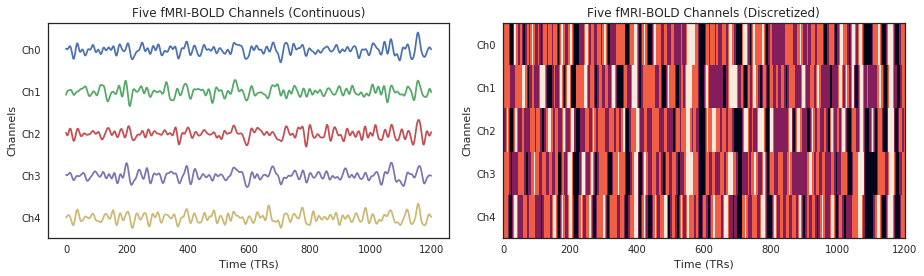

In [4]:
bold = zscore(data["signal"], axis=1) #Z-scored for data-hygiene reasons.
#For those that don't know: to z-score data is to subtract the mean, and divide by the standard deviation. 
#This results in data distributed around 0 w/ unit deviation. It does not make things Gaussian, but makes 
#things generally nicer.

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
for i in range(5):
    plt.plot(bold[i]-(10*i))
plt.xlabel("Time (TRs)")
plt.ylabel("Channels")
plt.yticks([0,-10,-20,-30,-40], ["Ch0", "Ch1", "Ch2", "Ch3", "Ch4"])
plt.title("Five fMRI-BOLD Channels (Continuous)")

#We can binzarize this data by putting every value X(t) > 0 to 1 and every value X(t) < 0 to 0.
#Recall that, for each time-series, we have forced the mean to be 0. Note that this makes assumptions about 
#stationarity that may not be appropraite if we actually cared about what the data really was.

discrete = deepcopy(bold) #This is a handy utility function, for Python-people whow haven't seen it before. 
discrete[discrete > 0] = 1 #Numpy indexing at work.
discrete[discrete < 0] = 0
discrete = discrete.astype("int16") #Use small integers if you can get away with it. Easier on RAM. 

#Uncomment below to try a different discretezation schema - in this case, instead of binary, it does 
#4 states, based on +/- 0 and then +/- 1 standard deviation. 

discrete = deepcopy(bold)
discrete = np.digitize(discrete, [-np.inf,-1, 0, 1,np.inf]) - 1

plt.subplot(1,2,2)
plt.imshow(discrete[:5, :], aspect="auto")
plt.xlabel("Time (TRs)")
plt.ylabel("Channels")
plt.yticks([0,1,2,3,4], ["Ch0", "Ch1", "Ch2", "Ch3", "Ch4"])
plt.title("Five fMRI-BOLD Channels (Discretized)")
plt.tight_layout()

In [5]:
#Let's take just one channel of interest:
ch0 = discrete[0]

#It's support set is just all unique values that it takes on:
ss = {x for x in ch0} #Python set objects make this very easy.
print("Support Set for Ch. 0:", ss)

#We can estimate the relative probabilities of every element of the support set by counting how many times 
#each one appears. 
#The Counter() function from the collections module does this automatically for us. 
C0 = Counter(ch0)
print("Counts:", C0)

#By dividing the number of counts for each outcome by the total number of observations, we get the probabilities.
num_events = sum(C0.values())
probs_0 = {key : C0[key] / num_events for key in C0.keys()} 
#Dict/Set/List comprehensions are your friend. Learn them. Love them. Don't use FOR loops if you can avoid it.
print("Probability Distribution:", probs_0)

Support Set for Ch. 0: {0, 1, 2, 3}
Counts: Counter({2: 469, 1: 380, 0: 183, 3: 168})
Probability Distribution: {2: 0.3908333333333333, 1: 0.31666666666666665, 0: 0.1525, 3: 0.14}


In [7]:
#Now we'll add another channel and look at some joint probabilities:
ch1 = discrete[1]
C1 = Counter(ch1)
probs_1 = {key : C1[key] / num_events for key in C1.keys()} 
#If we want the joint distribution, we need to make a pair of tuples that gives the joint state of 
#channel 0 and channel 1 at every moment in time. 

joint = list(zip(ch0, ch1))
#print(joint) #Uncomment this to see joint, but it's very long.

#Just like before, we can calculate the support set for the joint distribution:
ss_joint = {x for x in joint}
print("Support Set for the Joint Distribution:\n", ss_joint)

#And we can make a probability distribution
C_joint = Counter(joint)
probs_joint = {key : C_joint[key] / num_events for key in C_joint.keys()}

print("")
print("Joint Probability Dist:\n", probs_joint)

Support Set for the Joint Distribution:
 {(1, 2), (0, 1), (3, 2), (1, 3), (0, 0), (3, 3), (3, 0), (1, 0), (0, 2), (3, 1), (2, 1), (2, 0), (2, 3), (2, 2), (0, 3), (1, 1)}

Joint Probability Dist:
 {(2, 1): 0.135, (2, 2): 0.15166666666666667, (1, 2): 0.1125, (0, 1): 0.07833333333333334, (1, 1): 0.12833333333333333, (3, 1): 0.020833333333333332, (3, 2): 0.04416666666666667, (1, 3): 0.03833333333333333, (0, 3): 0.0075, (2, 0): 0.0575, (2, 3): 0.04666666666666667, (1, 0): 0.0375, (0, 2): 0.0325, (3, 3): 0.06666666666666667, (3, 0): 0.008333333333333333, (0, 0): 0.034166666666666665}


In [178]:
#We can also represent joint probabilities as a matrix. 
#Here, the rows correspond to the states of Ch. 0 and the columns are the states of Ch. 1.

#Always pre-allocate your arrays! Don't start w/ an empty list and add crap to it. 
M = np.zeros((len(C0), len(C1))) #Think about why this must always be true.
for key in probs_joint.keys(): #
    M[key[0]][key[1]] = probs_joint[key]

print("Joint Probability Matrix:")
print(M)

Joint Probability Matrix:
[[0.27833333 0.19083333]
 [0.22166667 0.30916667]]


In [160]:
#Note that summing the rows or columns of M gives us back our probability distributions 
#for a single channel. 

print(np.sum(M, axis=1)) #Because numpy axes are a mindf*ck, axis=1 gives you Ch. 0 and vice versa.
print(probs_0)

[0.46916667 0.53083333]
{1: 0.5308333333333334, 0: 0.4691666666666667}


In [161]:
#Now that we have out joint probability matrix, we can ask something interesting:
#Does P(X,Y) = P(X)P(Y)?
#To do that, we make a new matrix, N, and multiply together the marginal probabilities taken from our dicts.
#We then compare M with N

N = np.zeros((len(C0), len(C1)))
for i in C0.keys():
    for j in C1.keys():
        N[i][j] = probs_0[i]*probs_1[j]

print("Joint Probability Matrix")
print(M)
print("")
print("Independent Probability Matrix")
print(N)

Joint Probability Matrix
[[0.27833333 0.19083333]
 [0.22166667 0.30916667]]

Independent Probability Matrix
[[0.23458333 0.23458333]
 [0.26541667 0.26541667]]
